**Compañia de extracción de petróleo Oily Giant** <br>
Encontrar los mejores 200 lugares donde abrir 200 pozos nuevos de petroleo<br>
Se cuenta con los datos de muestras de crudo de tres regiones, ya se conocen los parametros de cada pozo petrolero de la region. <br>
Crear un modelo que ayude a elegir la region con el mayor margen de beneficio. <br>
Analizar los riesgos potenciales utilizando la tecnica bootstrapping <br>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

#### Conjunto de datos geo_0

In [3]:
geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
geo_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


*Redondeamos a 3 decimales la cantidad de producto (volumen de reservas en miles de barriles) para trabajar mejor con los datos*

In [5]:
geo_0 ['product'] = geo_0['product'].round(3)

In [6]:
geo_0.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280
1,2acmU,1.334711,-0.340164,4.365080,73.038
2,409Wp,1.022732,0.151990,1.419926,85.266
3,iJLyR,-0.032172,0.139033,2.978566,168.621
4,Xdl7t,1.988431,0.155413,4.751769,154.037


**Eliminamos la fila id, ya que se compone de caracteres alfanumericos, eso al momento de buscar algun dato especifico puede representar un problema, podemos solo manejarlo por el indice**

In [7]:
geo_0 = geo_0.drop('id', axis=1)
geo_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280
1,1.334711,-0.340164,4.365080,73.038
2,1.022732,0.151990,1.419926,85.266
3,-0.032172,0.139033,2.978566,168.621
4,1.988431,0.155413,4.751769,154.037


**Ordenamos geo_0 en orden ascendente para conocer el mas bajo y el mas alto, en cantidad de barriles de reserva**

In [8]:
geo_0_asc = geo_0.sort_values(by='product')
geo_0_asc

,f0,f1,f2,product
57263,-0.702064,0.375992,0.236572,0.000
97721,0.701532,0.808797,-2.221334,0.004
58769,-0.702486,0.523053,-1.224802,0.006
5105,-0.701882,0.570246,2.288005,0.009
55969,-0.792553,0.439711,-0.696314,0.022
...,...,...,...,...
45291,1.758787,-0.395038,6.719085,185.352
1925,0.624430,-0.469312,5.753677,185.355
94175,0.351428,-0.400244,7.227618,185.356
99818,0.518445,-0.412790,4.951916,185.363


#### *Dividir los datos en conjunto de entrenamiento y validacion*<br>
**Aplicamos la Raiz del Error Cuadratico Medio RMSE**

In [9]:
features = geo_0.drop(['product'], axis=1)
target = geo_0['product']# extrae los objetivos

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
model = LinearRegression()# inicializa el constructor de modelos
model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
rmse_0 = mean_squared_error(target_valid, predictions_valid)**0.5
rmse_0

37.579422134351255

**Aplicamos la comparativa con el Error absoluto medio MAE, se observa una diferencia de 6 mil barriles por debajo del RMSE**

In [10]:
mae = mean_absolute_error(target_valid, predictions_valid)
mae

30.919600289738746

**Conocemos las caracteristicas del conjunto de datos, incluida la media y los valores minimos y maximos**

In [11]:
geo_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288692
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497750
50%,0.502360,0.250252,2.515969,91.850000
75%,1.073581,0.700646,4.715088,128.564000
max,2.362331,1.343769,16.003790,185.364000


*Observamos un RMSE elevado, correspondiente a un rango de error de 37694 barriles de error en el calculo, lo cual indica un error bastante elevado, considerando que el total de muestras es de 100000, lo equivalente a un 37%, esto puede verse afectado por los outliers con los que se cuenta en el df*<br>
A continuacion colocamos un grafico de cajas para tener mayor nocion de los elementos atipicos

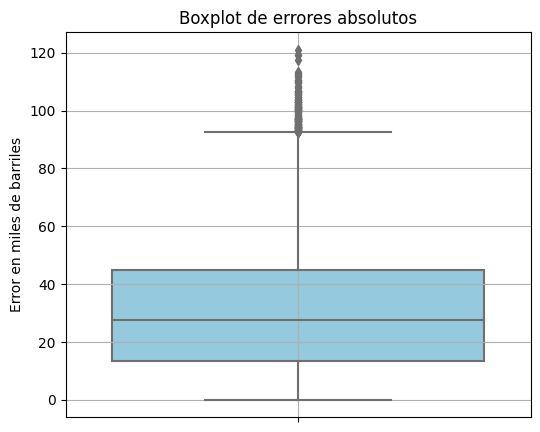

In [12]:
# Calcula errores absolutos
abs_errors = abs(target_valid - predictions_valid)

plt.figure(figsize=(6, 5))
sns.boxplot(y=abs_errors, color='skyblue')
plt.title('Boxplot de errores absolutos')
plt.ylabel('Error en miles de barriles')
plt.grid(True)
plt.show()

**Agregamos una columna con el valor en dolares, considerando que el ingreso de una unidad de producto es de USD $4500, y el volumen de reservas esta expresado en miles de barriles**

In [13]:
geo_0['valor_USD'] = geo_0['product']*4500
geo_0

,f0,f1,f2,product,valor_USD
0,0.705745,-0.497823,1.221170,105.280,473760.0
1,1.334711,-0.340164,4.365080,73.038,328671.0
2,1.022732,0.151990,1.419926,85.266,383697.0
3,-0.032172,0.139033,2.978566,168.621,758794.5
4,1.988431,0.155413,4.751769,154.037,693166.5
...,...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744,498348.0
99996,1.392429,-0.382606,1.273912,122.347,550561.5
99997,1.029585,0.018787,-1.348308,64.375,289687.5
99998,0.998163,-0.528582,1.583869,74.041,333184.5


*Separamos los primeros 200 pozos con mayor produccion de la region geo_0*

In [14]:
top_200 = geo_0.sort_values(by='product', ascending = False).head(200)
top_200

,f0,f1,f2,product,valor_USD
8826,1.797736,0.098212,6.148260,185.364,834138.0
99818,0.518445,-0.412790,4.951916,185.363,834133.5
94175,0.351428,-0.400244,7.227618,185.356,834102.0
1925,0.624430,-0.469312,5.753677,185.355,834097.5
45291,1.758787,-0.395038,6.719085,185.352,834084.0
...,...,...,...,...,...
34856,2.038708,0.271003,3.791803,184.366,829647.0
54135,1.108500,-0.583939,1.503254,184.362,829629.0
63598,1.330398,-0.523232,6.365799,184.361,829624.5
4941,1.674001,0.016279,3.869249,184.359,829615.5


Separamos variables para conocer la media global respecto a la produccion minima requerida de 111.11 unidades

In [15]:
inversion_total = 100000000
pozos = 200
valor_min = 500000
unidades_por_pozo = 111.1

In [16]:
media_global_geo_0 = geo_0['product'].mean()
print("Producción media general:", media_global_geo_0)

if media_global_geo_0 >= 111.1:
    print("La media global supera el umbral de rentabilidad.")
else:
    print("La media global está por debajo del umbral requerido.")


Producción media general: 92.5000003
La media global está por debajo del umbral requerido.


**Si nos enfocamos en la media regional, en este caso solo considerando la region geo_0, la produccion media esta por debajo de lo requerido que son 111.1 unidades minimas de produccion, sin embargo, si solo consideramos la produccion de los pozos dentro del top 200, encontraremos que la media esta por encima de minimo requerido**

In [17]:
media_top_200 = top_200['product'].mean()
media_top_200

184.83373

In [18]:
umbral = 111.1
mayor_a_umbral = geo_0[geo_0['product'] > umbral].shape[0]
print(f"Pozos con más de {umbral} unidades: {mayor_a_umbral}")

Pozos con más de 111.1 unidades: 36593


In [19]:
rentables = geo_0[(geo_0['valor_USD'] >= 500000) & (geo_0['product']>= umbral)]
print(f"Pozos rentables: {rentables.shape[0]}")

Pozos rentables: 36583


In [20]:
total_usd_geo_0 = rentables['valor_USD'].sum()
print(f"Ingreso total estimado: ${total_usd_geo_0:,.2f}")

Ingreso total estimado: $23,120,401,090.50


**Si consideramos solo la produccion del top 200, podriamos decir que en efecto se cubre la demanda solicitada**<br>
Con estos valores para la region geo_0, podemos asumir que solo el 36.5% de los pozos, son rentables (considerando que son mayores a 500 mil USD y por encima de 111.1 unidades), derivado de lo que hasta ahora podemos ver con respecto a los niveles de produccion y su valor en USD<br>
Si hacemos una comparativa con la media global, evidentemente se queda muy por debajo de lo minimo establecido para que pueda ser rentable, sin embargo, esto se puede adjudicar a que hay pozos, por lo menos en esta region que no se consideran lo suficientemente productivos, lo cual afecta los valores de forma directa disminuyendo abrupatmente la media global al notarse valores atipicos y lejanos de donde se concentra la mayoria<br>

### Region geo_1

In [21]:
geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [22]:
geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Aplicamos el RMSE al conjunto de la Region geo_1

In [23]:
geo_1 = geo_1.drop('id', axis=1)

In [24]:
geo_1['product'] = geo_1['product'].round(3)
geo_1

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179
1,14.272088,-3.475083,0.999183,26.953
2,6.263187,-5.948386,5.001160,134.766
3,-13.081196,-11.506057,4.999415,137.945
4,12.702195,-8.147433,5.004363,134.766
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.907
99996,-10.160631,-12.558096,5.005581,137.945
99997,-7.378891,-3.084104,4.998651,137.945
99998,0.665714,-6.152593,1.000146,30.132


**RMSE geo_1**

In [25]:
features = geo_1.drop(['product'], axis=1)
target = geo_1['product']# extrae los objetivos

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
model = LinearRegression()# inicializa el constructor de modelos
model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
rmse_1 = mean_squared_error(target_valid, predictions_valid)**0.5
rmse_1

0.8930693627619285

Arroja un error promedio de 0.89 (890 barriles) considerando los valores reales respecto a las predicciones

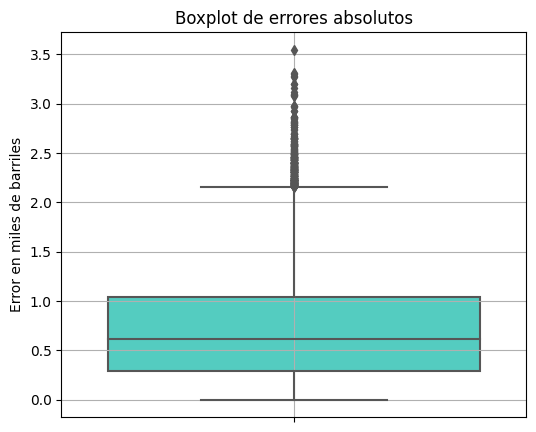

In [26]:
# Calcula errores absolutos
abs_errors1 = abs(target_valid - predictions_valid)

plt.figure(figsize=(6, 5))
sns.boxplot(y=abs_errors1, color='turquoise')
plt.title('Boxplot de errores absolutos')
plt.ylabel('Error en miles de barriles')
plt.grid(True)
plt.show()

In [27]:
geo_1['valor_USD'] = geo_1['product']*4500
geo_1

,f0,f1,f2,product,valor_USD
0,-15.001348,-8.276000,-0.005876,3.179,14305.5
1,14.272088,-3.475083,0.999183,26.953,121288.5
2,6.263187,-5.948386,5.001160,134.766,606447.0
3,-13.081196,-11.506057,4.999415,137.945,620752.5
4,12.702195,-8.147433,5.004363,134.766,606447.0
...,...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.907,242581.5
99996,-10.160631,-12.558096,5.005581,137.945,620752.5
99997,-7.378891,-3.084104,4.998651,137.945,620752.5
99998,0.665714,-6.152593,1.000146,30.132,135594.0


In [28]:
top_200_geo_1 = geo_1.sort_values(by='product', ascending = False).head(200)
top_200_geo_1

,f0,f1,f2,product,valor_USD
53864,2.901352,-3.475398,5.001393,137.945,620752.5
97083,-4.030430,-14.020643,5.009571,137.945,620752.5
88340,-3.373117,-9.227661,4.994369,137.945,620752.5
64879,-5.360281,-2.388204,5.001439,137.945,620752.5
7288,-8.058661,-2.244840,5.000753,137.945,620752.5
...,...,...,...,...,...
88496,-3.160538,-6.225915,4.999458,137.945,620752.5
92616,-11.067158,-0.340721,4.999463,137.945,620752.5
41100,-7.557897,-1.563086,5.001729,137.945,620752.5
7584,-3.325670,-6.932481,4.998615,137.945,620752.5


In [29]:
media_global_geo_1 = geo_1['product'].mean()
print("Producción media global geo_1:", media_global_geo_1)

if media_global_geo_1 >= unidades_por_pozo:
    print("La media global supera el umbral de rentabilidad.")
else:
    print("La media global está por debajo del umbral requerido.")


Producción media global geo_1: 68.82496409999999
La media global está por debajo del umbral requerido.


In [30]:
rentables_geo_1 = geo_1[(geo_1['valor_USD'] >= 500000) & (geo_1['product']>= umbral)]
print(f"Pozos rentables: {rentables_geo_1.shape[0]}")

Pozos rentables: 16537


#### Region geo_2

In [31]:
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [32]:
geo_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [33]:
geo_2 = geo_2.drop('id', axis = 1)

In [34]:
geo_2['product'] = geo_2['product'].round(3)
geo_2

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.759
1,0.262778,0.269839,-2.530187,56.070
2,0.194587,0.289035,-5.586433,62.872
3,2.236060,-0.553760,0.930038,114.573
4,-0.515993,1.716266,5.899011,149.601
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327
99996,-1.261523,-0.894828,2.524545,138.749
99997,-1.199934,-2.957637,5.219411,157.080
99998,-2.419896,2.417221,-5.548444,51.795


In [35]:
geo_2['valor_USD'] = geo_2['product']*4500
geo_2

,f0,f1,f2,product,valor_USD
0,-1.146987,0.963328,-0.828965,27.759,124915.5
1,0.262778,0.269839,-2.530187,56.070,252315.0
2,0.194587,0.289035,-5.586433,62.872,282924.0
3,2.236060,-0.553760,0.930038,114.573,515578.5
4,-0.515993,1.716266,5.899011,149.601,673204.5
...,...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327,775471.5
99996,-1.261523,-0.894828,2.524545,138.749,624370.5
99997,-1.199934,-2.957637,5.219411,157.080,706860.0
99998,-2.419896,2.417221,-5.548444,51.795,233077.5


In [36]:
top_200_geo_2 = geo_2.sort_values(by='product', ascending = False).head(200)
top_200_geo_2

,f0,f1,f2,product,valor_USD
79705,-2.747914,1.555227,3.342182,190.030,855135.0
93444,3.026506,1.344623,8.891243,190.014,855063.0
35099,2.848844,-1.701996,9.437101,190.012,855054.0
21943,-2.500091,2.024392,6.291513,190.011,855049.5
37870,-0.686667,-3.219452,5.963290,190.010,855045.0
...,...,...,...,...,...
53814,2.122462,-1.071496,4.818192,189.039,850675.5
96482,1.071479,-1.978181,4.437436,189.039,850675.5
5138,1.509688,3.125449,11.400160,189.037,850666.5
91855,0.415052,-2.409421,2.205990,189.025,850612.5


In [37]:
rentables_geo_2 = geo_2[(geo_2['valor_USD'] >= 500000) & (geo_2['product']>= umbral)]
print(f"Pozos rentables: {rentables_geo_2.shape[0]}")

Pozos rentables: 38178


In [38]:
media_global_geo_2 = geo_2['product'].mean()
print("Producción media global geo_2:", media_global_geo_2)

if media_global_geo_2 >= unidades_por_pozo:
    print("La media global supera el umbral de rentabilidad.")
else:
    print("La media global está por debajo del umbral requerido.")

Producción media global geo_2: 94.99999961000003
La media global está por debajo del umbral requerido.


**RMSE geo_2**

In [39]:
features = geo_2.drop(['product'], axis=1)
target = geo_2['product']# extrae los objetivos

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
model = LinearRegression()# inicializa el constructor de modelos
model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
rmse_2 = mean_squared_error(target_valid, predictions_valid)**0.5
rmse_2

1.891180280021033e-14

**Comparativa de la Raiz del Error cuadratico medio entre las regiones geo_0, geo_1, geo_2**

In [40]:
print(f"RMSE geo_0: {rmse_0:.2f}")
print(f"RMSE geo_1: {rmse_1:.2f}")
print(f"RMSE geo_2: {rmse_2:.2f}")

RMSE geo_0: 37.58
RMSE geo_1: 0.89
RMSE geo_2: 0.00


In [41]:
top_200

,f0,f1,f2,product,valor_USD
8826,1.797736,0.098212,6.148260,185.364,834138.0
99818,0.518445,-0.412790,4.951916,185.363,834133.5
94175,0.351428,-0.400244,7.227618,185.356,834102.0
1925,0.624430,-0.469312,5.753677,185.355,834097.5
45291,1.758787,-0.395038,6.719085,185.352,834084.0
...,...,...,...,...,...
34856,2.038708,0.271003,3.791803,184.366,829647.0
54135,1.108500,-0.583939,1.503254,184.362,829629.0
63598,1.330398,-0.523232,6.365799,184.361,829624.5
4941,1.674001,0.016279,3.869249,184.359,829615.5


In [42]:
top_200_geo_1

,f0,f1,f2,product,valor_USD
53864,2.901352,-3.475398,5.001393,137.945,620752.5
97083,-4.030430,-14.020643,5.009571,137.945,620752.5
88340,-3.373117,-9.227661,4.994369,137.945,620752.5
64879,-5.360281,-2.388204,5.001439,137.945,620752.5
7288,-8.058661,-2.244840,5.000753,137.945,620752.5
...,...,...,...,...,...
88496,-3.160538,-6.225915,4.999458,137.945,620752.5
92616,-11.067158,-0.340721,4.999463,137.945,620752.5
41100,-7.557897,-1.563086,5.001729,137.945,620752.5
7584,-3.325670,-6.932481,4.998615,137.945,620752.5


In [43]:
top_200_geo_2

,f0,f1,f2,product,valor_USD
79705,-2.747914,1.555227,3.342182,190.030,855135.0
93444,3.026506,1.344623,8.891243,190.014,855063.0
35099,2.848844,-1.701996,9.437101,190.012,855054.0
21943,-2.500091,2.024392,6.291513,190.011,855049.5
37870,-0.686667,-3.219452,5.963290,190.010,855045.0
...,...,...,...,...,...
53814,2.122462,-1.071496,4.818192,189.039,850675.5
96482,1.071479,-1.978181,4.437436,189.039,850675.5
5138,1.509688,3.125449,11.400160,189.037,850666.5
91855,0.415052,-2.409421,2.205990,189.025,850612.5


**Evaluamos primero las regiones sin submuestreo, solo considerando el top 200 de pozos mas productivos en cada region, esto previo a evaluar las submuestras requeridas, con el objetivo de tener una comparativa del funcionamiento aplicado de bootstrapping, con esto podemos analizar las diferencias**

In [44]:
#Aplicamos una funcion donde seleccionamos solo el top 200, sin considerar las 500 submuestras
dfs = geo_0, geo_1, geo_2
def evaluar_regiones(dfs, precio_por_mil_barriles=4500):
    resumen = {}

    for i, df in enumerate(dfs):
        # Cargar datos
        region = f"Región {i}"

        # Separar features y target
        features = df.drop(columns=['product'])
        target = df['product']

        # Dividir en entrenamiento y validación considerando 75 - 25
        X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=42)

        # Entrenar modelo
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predecir sobre todo el conjunto original
        df = df.copy()
        df['prediccion_product']= model.predict(features)

        # Seleccionar los 200 pozos con mayor volumen predicho
        top_200 = df.sort_values(by='prediccion_product', ascending=False).head(200)
        
        # Calcular volumen y ganancia
        volumen_total = top_200['prediccion_product'].sum()
        ganancia_total = volumen_total * precio_por_mil_barriles
        
        # Guardar resumen por región
        resumen[region] = {'volumen_total': volumen_total, 'ganancia_total': ganancia_total,'top_200': top_200
        }

    # Elegir la mejor región
    mejor_region = max(resumen, key=lambda r: resumen[r]['ganancia_total'])
    resumen['recomendacion'] = {
        'region': mejor_region,
        'ganancia': resumen[mejor_region]['ganancia_total']
    }

    return resumen

In [45]:
resultados = evaluar_regiones(dfs)

for region, datos in resultados.items():
    if region != 'recomendacion':
        print(f"{region}:")
        print(f"  Volumen estimado: {datos['volumen_total']:.2f} miles de barriles")
        print(f"  Ganancia estimada: ${datos['ganancia_total']:,.2f}\n")

print("Región recomendada para inversión:", resultados['recomendacion']['region'])
print("Ganancia estimada:", f"${resultados['recomendacion']['ganancia']:,.2f}")


Región 0:
  Volumen estimado: 36966.75 miles de barriles
  Ganancia estimada: $166,350,357.00

Región 1:
  Volumen estimado: 27589.00 miles de barriles
  Ganancia estimada: $124,150,500.00

Región 2:
  Volumen estimado: 37910.30 miles de barriles
  Ganancia estimada: $170,596,332.00

Región recomendada para inversión: Región 2
Ganancia estimada: $170,596,332.00


**Aplicacion de bootstrapping, a las predicciones utilizando 1000 muestras para hallar la distribucion de beneficios**<br>
Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.<br>
El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.<br>
Un barril de materias primas genera 4.5 USD de ingresos. <br>
El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).<br>
Guardaremos la información relevante para el cálculo en las siguiente variables:<br>

**tamano_muestra:** 500 puntos seleccionados para el estudio <br>
**top_pozos:** los mejores 200 puntos o con mayor volumen de reservas <br>
**presupuesto:** presupuesto para el desarrollo de 200 pozos (en dólares)<br>
**ganancia_x_barril:** ganancia por barril (en dólares)<br>
**precio_por_mil_barriles:** ganancia por unidad de producto (en dólares)<br>

In [46]:
tamano_muestra = 500
top_pozos = 200
presupuesto = 100000000
ganancia_x_barril = 4.5
precio_por_mil_barriles = 4500
n_iteraciones = 1000
costo_por_pozo = 500000

In [47]:
#Costo de inversion para 1 pozo
costo_x_pozo = presupuesto / top_pozos
print(f'Costos de inversion por pozo:', costo_x_pozo, 'USD')

Costos de inversion por pozo: 500000.0 USD


#### Calculamos el volumen de reservas necesaria para desarrollar un pozo sin perdidas

In [48]:
volumen_reserva = costo_x_pozo/precio_por_mil_barriles
volumen_reserva

111.11111111111111

#### Volumen medio de reserva por region en miles de barriles o unidades

In [49]:
print('Volumen medio de reservas geo_0:', round(geo_0['product'].mean(), 3))
print('Volumen medio de reservas geo_1:', round(geo_1['product'].mean(), 3))
print('Volumen medio de reservas geo_2:', round(geo_2['product'].mean(), 3))

Volumen medio de reservas geo_0: 92.5
Volumen medio de reservas geo_1: 68.825
Volumen medio de reservas geo_2: 95.0


**Aplicamos bootstrapping con 500 submuestras, considerando el top 200**

In [50]:
def evaluar_regiones_bootstrapping(dfs):
    resumen = {}

    for i, df in enumerate(dfs):
        region = f"Región {i}"

        # Separar features y target
        features = df.drop(columns=['product'])
        target = df['product']

        # División de datos
        X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=42)

        # Entrenar modelo
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predicción sobre todo el conjunto
        df = df.copy()
        df['prediccion_product'] = model.predict(features)

        # Bootstrapping con submuestreo
        ganancias = []
        for _ in range(n_iteraciones):
            muestra = df.sample(n=tamano_muestra, replace=True)
            mejores_200 = muestra.sort_values(by='prediccion_product', ascending=False).head(top_pozos)
            volumen = mejores_200['product'].sum()
            ingreso = volumen * precio_por_mil_barriles
            costo = top_pozos * costo_por_pozo
            beneficio = ingreso - costo
            ganancias.append(beneficio)

        ganancias = pd.Series(ganancias)
        promedio = ganancias.mean()
        intervalo = [ganancias.quantile(0.025), ganancias.quantile(0.975)]
        riesgo = (ganancias < 0).mean() * 100

        resumen[region] = {
            'ganancia_promedio': promedio,
            'intervalo_confianza': intervalo,
            'riesgo_perdida': riesgo,
            'distribucion': ganancias
        }

    # Selección de la mejor región
    regiones_validas = {r: d for r, d in resumen.items() if d['riesgo_perdida'] < 2.5}
    mejor_region = max(regiones_validas, key=lambda r: regiones_validas[r]['ganancia_promedio'])

    resumen['recomendacion'] = {
        'region': mejor_region,
        'ganancia': resumen[mejor_region]['ganancia_promedio'],
        'intervalo': resumen[mejor_region]['intervalo_confianza'],
        'riesgo': resumen[mejor_region]['riesgo_perdida']
    }

    return resumen

In [51]:
resultados = evaluar_regiones_bootstrapping((geo_0, geo_1, geo_2))

for region, datos in resultados.items():
    if region != 'recomendacion':
        print(f"{region}:")
        print(f"  Ganancia promedio: ${datos['ganancia_promedio']:,.2f}")
        print(f"  IC 95%: ${datos['intervalo_confianza'][0]:,.2f} – ${datos['intervalo_confianza'][1]:,.2f}")
        print(f"  Riesgo de pérdida: {datos['riesgo_perdida']:.2f}%\n")

print("Región recomendada:", resultados['recomendacion']['region'])
print("Ganancia estimada:", f"${resultados['recomendacion']['ganancia']:,.2f}")
print("Intervalo de confianza:", f"${resultados['recomendacion']['intervalo'][0]:,.2f} – ${resultados['recomendacion']['intervalo'][1]:,.2f}")
print("Riesgo de pérdida:", f"{resultados['recomendacion']['riesgo']:.2f}%")


Región 0:
  Ganancia promedio: $23,862,900.82
  IC 95%: $19,899,042.76 – $27,492,902.11
  Riesgo de pérdida: 0.00%

Región 1:
  Ganancia promedio: $4,464,313.92
  IC 95%: $767,591.45 – $8,502,258.50
  Riesgo de pérdida: 1.30%

Región 2:
  Ganancia promedio: $26,371,020.79
  IC 95%: $22,115,830.85 – $30,309,866.90
  Riesgo de pérdida: 0.00%

Región recomendada: Región 2
Ganancia estimada: $26,371,020.79
Intervalo de confianza: $22,115,830.85 – $30,309,866.90
Riesgo de pérdida: 0.00%


In [52]:
resumen_tabla = []

for region, datos in resultados.items():
    if region != 'recomendacion':
        
        resumen_tabla.append({
            'Región': region,
            'Ganancia Promedio (millones USD)': round(datos['ganancia_promedio'] / 1_000_000, 2),
            'Desv_std (millones USD)': round(datos['distribucion'].std()/1000000, 2),
            'IC 95% Inferior (millones USD)': round(datos['intervalo_confianza'][0] / 1_000_000, 2),
            'IC 95% Superior (millones USD)': round(datos['intervalo_confianza'][1] / 1_000_000, 2),
            'Riesgo de Pérdida (%)': round(datos['riesgo_perdida'], 2)
        })
    
tabla_resultados = pd.DataFrame(resumen_tabla)
tabla_resultados

,Región,Ganancia Promedio (millones USD),Desv_std (millones USD),IC 95% Inferior (millones USD),IC 95% Superior (millones USD),Riesgo de Pérdida (%)
0,Región 0,23.86,1.94,19.90,27.49,0.0
1,Región 1,4.46,2.04,0.77,8.50,1.3
2,Región 2,26.37,2.03,22.12,30.31,0.0


In [53]:
recomendacion = resultados['recomendacion']
print("\n Región recomendada:")
print(f" {recomendacion['region']}")
print(f" Ganancia promedio: ${recomendacion['ganancia'] / 1_000_000:,.2f} millones")
print(f" IC 95%: ${recomendacion['intervalo'][0] / 1_000_000:,.2f} – ${recomendacion['intervalo'][1] / 1_000_000:,.2f} millones")
print(f" Riesgo de pérdida: {recomendacion['riesgo']:.2f}%")


 Región recomendada:
 Región 2
 Ganancia promedio: $26.37 millones
 IC 95%: $22.12 – $30.31 millones
 Riesgo de pérdida: 0.00%


#### *CONCLUSIONES*

Con base en los resultados obtenidos, se pueden inferir diferentes aspectos<br>

De entrada, se podria suponer que a mayor cantidad de recurso obtenido, pudiera ser un buen aliciente que indicara que es la region es optima para llevar a cabo la inversion, sin embargo, al aplicar los parametros que nos indican la volatilidad del modelo, es donde podemos inferir que no precisamente es la mejor opcion<br>

Al inicio, se observa que los valores indican un rendimiento optimo (por los calculos de forma manual) en la region pretolifera *geo_0*, donde por los valores indicados con ingresos mayores o iguales a 500 mil USD y con una produccion mayor o igual a 111.1 unidades, se posicionaba con mejor rendimiento con una produccion de **38,615 pozos y un ingreso total estimado: $23,120,401,090.50**.<br>

Sin embargo, es importante reconocer que los resultados obtenidos una vez que se aplicaron las pruebas estadisticas, bootstrapping, los resultados favorecen mas a otra region, sobre todo por el hecho de predecir las ventajas que estos pueden seguir manteniendo a futuro

En este caso, la region que mostro una mayor ganancia fue la region *geo_2* con **26.4 millones de dolares**, y la que registró menos fue la región *geo_1* con **4.47 millones de dolares**, una vez conocido este dato, podemos ver que la region mas conveniente para invertir es la region *geo_2*, con un riesgo potencial de 0%, con perdidas de aproximadamente 2 millones de dolares, esto lo podemos observar en el resultado de la desviacion estandar (2.05 millones USD), un indice realmente bajo (7.8%) para los ingresos estimados.<br>

Incluso, se pudo observar desde que se realizo la prueba de la raiz del error cuadratico medio (RMSE = 1.891180280021033e-14), un indice bastante bajo, indicando que el nivel de error es practicamente nulo y el modelo se ajusta bastante bien a los datos.

Por tanto, se considera que la region para abrir 200 pozos nuevos es la region **geo_2**, con base en los datos con los que se trabajó, aunque haria falta conocer más datos con otras condiciones si es que se quiere mejorar la perspectiva de los resultados ampliando el panorama según se requiera.